In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [2]:
# 
raw_dataset = pd.read_csv("paris-listings-clean.csv",
                      na_values = "?", comment='\t',skipinitialspace=True,
                      sep=",",index_col=False)

dataset = raw_dataset.copy()
del dataset["index"]
del dataset["has_availability"]
dataset.head()


host_response_time  property_type  room_type  bed_type  \
0                   3              1          0         4   
1                   3              1          0         4   
2                   1             16          0         4   
3                   3              1          0         4   
4                   2              1          0         4   

   cancellation_policy  host_response_rate  price  security_deposit  \
0                    2                  99    256                 0   
1                    1                 100     85               255   
2                    2                  90    195               400   
3                    1                 100   1200               700   
4                    1                 100     60                 0   

   cleaning_fee  extra_people  ...  review_scores_rating  \
0            95            30  ...                  94.0   
1            60             0  ...                  77.0   
2            50            30  ...                  88.0   
3            75            20  ...                  50.0   
4             0            15  ...                  85.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                     8.0                        9.0                    9.0   
2                     9.0                        9.0                    9.0   
3                     6.0                       10.0                    2.0   
4                     9.0                        8.0                    9.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                     9.0                  9.0   
1                          9.0                    10.0                  8.0   
2                          9.0                    10.0                  9.0   
3                          6.0                     6.0                  5.0   
4                          9.0                    10.0                 10.0   

   calculated_host_listings_count  \
0                              73   
1                               1   
2                               3   
3                              46   
4                               1   

   calculated_host_listings_count_entire_homes  reviews_per_month  
0                                           72               4.12  
1                                            1               2.18  
2                                            3               2.53  
3                                           46               0.27  
4                                            1               0.97  

[5 rows x 44 columns]

In [3]:
dataset.isna().sum()

host_response_time                             0
property_type                                  0
room_type                                      0
bed_type                                       0
cancellation_policy                            0
host_response_rate                             0
price                                          0
security_deposit                               0
cleaning_fee                                   0
extra_people                                   0
host_is_superhost                              0
host_has_profile_pic                           0
host_identity_verified                         0
instant_bookable                               0
host_listings_count                            0
accommodates                                   0
bathrooms                                      0
bedrooms                                       0
beds                                           0
guests_included                                0
minimum_nights      

In [4]:
dataset = dataset.dropna()

In [5]:
dataset.isna().sum()

host_response_time                             0
property_type                                  0
room_type                                      0
bed_type                                       0
cancellation_policy                            0
host_response_rate                             0
price                                          0
security_deposit                               0
cleaning_fee                                   0
extra_people                                   0
host_is_superhost                              0
host_has_profile_pic                           0
host_identity_verified                         0
instant_bookable                               0
host_listings_count                            0
accommodates                                   0
bathrooms                                      0
bedrooms                                       0
beds                                           0
guests_included                                0
minimum_nights      

In [6]:
dataset = dataset.apply(pd.to_numeric,errors='coerce')
dataset.tail()

host_response_time  property_type  room_type  bed_type  \
26286                   1              1          0         4   
26287                   1              1          0         4   
26288                   2              1          0         4   
26289                   1              1          0         4   
26290                   3              1          0         4   

       cancellation_policy  host_response_rate  price  security_deposit  \
26286                    2                 100    140               500   
26287                    1                 100     88               200   
26288                    1                 100     70               200   
26289                    2                  67    100               500   
26290                    4                  99    219               450   

       cleaning_fee  extra_people  ...  review_scores_rating  \
26286           150             0  ...                  97.0   
26287            10             5  ...                  89.0   
26288            50            17  ...                  91.0   
26289            50             0  ...                  95.0   
26290            85             0  ...                  79.0   

       review_scores_accuracy  review_scores_cleanliness  \
26286                    10.0                       10.0   
26287                     9.0                        8.0   
26288                    10.0                        9.0   
26289                    10.0                       10.0   
26290                     9.0                        8.0   

       review_scores_checkin  review_scores_communication  \
26286                   10.0                         10.0   
26287                   10.0                         10.0   
26288                   10.0                         10.0   
26289                   10.0                         10.0   
26290                    9.0                          8.0   

       review_scores_location  review_scores_value  \
26286                    10.0                  9.0   
26287                    10.0                  9.0   
26288                     9.0                  9.0   
26289                    10.0                 10.0   
26290                     9.0                  8.0   

       calculated_host_listings_count  \
26286                               1   
26287                               1   
26288                               2   
26289                               2   
26290                              42   

       calculated_host_listings_count_entire_homes  reviews_per_month  
26286                                            1               0.09  
26287                                            1               0.59  
26288                                            2               0.34  
26289                                            2               0.24  
26290                                           42               3.51  

[5 rows x 44 columns]

In [7]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [22]:
# sns.pairplot(train_dataset)

train_dataset.to_csv("train_dataset_final.csv")
test_dataset.to_csv("test_dataset_final.csv")


In [9]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

count        mean         std  \
host_response_time                           21033.0    2.364475    0.850512   
property_type                                21033.0    2.128275    3.792146   
room_type                                    21033.0    0.191746    0.592671   
bed_type                                     21033.0    3.955926    0.278402   
cancellation_policy                          21033.0    1.307850    0.773506   
host_response_rate                           21033.0   93.599914   16.040207   
security_deposit                             21033.0  392.658346  543.703660   
cleaning_fee                                 21033.0   43.663624   35.358737   
extra_people                                 21033.0    8.620977   17.017601   
host_is_superhost                            21033.0    0.221462    0.415240   
host_has_profile_pic                         21033.0    0.998241    0.041906   
host_identity_verified                       21033.0    0.372415    0.483460   
instant_bookable                             21033.0    0.413969    0.492555   
host_listings_count                          21033.0   15.641563   91.839127   
accommodates                                 21033.0    3.286027    1.713799   
bathrooms                                    21033.0    1.162839    0.876538   
bedrooms                                     21033.0    1.154091    1.148982   
beds                                         21033.0    1.779347    1.297856   
guests_included                              21033.0    1.715590    1.240227   
minimum_nights                               21033.0    4.544050   11.950353   
maximum_nights                               21033.0  678.873437  632.244980   
minimum_minimum_nights                       21033.0    4.392859   11.794134   
maximum_minimum_nights                       21033.0    5.110160   14.809115   
minimum_maximum_nights                       21033.0  673.529501  633.470939   
maximum_maximum_nights                       21033.0  685.534731  631.113449   
minimum_nights_avg_ntm                       21033.0    4.753754   12.183514   
maximum_nights_avg_ntm                       21033.0  676.522403  632.277951   
availability_30                              21033.0    6.206200    8.550520   
availability_60                              21033.0   15.152665   17.538181   
availability_90                              21033.0   26.736367   28.020637   
availability_365                             21033.0  119.711026  128.511563   
number_of_reviews                            21033.0   33.261256   50.712536   
number_of_reviews_ltm                        21033.0   13.051395   15.600509   
review_scores_rating                         21033.0   92.633100    8.345688   
review_scores_accuracy                       21033.0    9.579185    0.779100   
review_scores_cleanliness                    21033.0    9.236295    0.987070   
review_scores_checkin                        21033.0    9.628441    0.764092   
review_scores_communication                  21033.0    9.674274    0.727700   
review_scores_location                       21033.0    9.725479    0.595601   
review_scores_value                          21033.0    9.195788    0.895971   
calculated_host_listings_count               21033.0    8.280179   25.182784   
calculated_host_listings_count_entire_homes  21033.0    7.714068   24.612501   
reviews_per_month                            21033.0    1.634654    1.494311   

                                               min    25%      50%      75%  \
host_response_time                            0.00   2.00     3.00     3.00   
property_type                                 0.00   1.00     1.00     1.00   
room_type                                     0.00   0.00     0.00     0.00   
bed_type                                      0.00   4.00     4.00     4.00   
cancellation_policy                           0.00   1.00     1.00     2.00   
host_response_rate                            0.00  

In [10]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

In [11]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2816      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,041
Trainable params: 7,041
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.38371748],
       [-0.19571409],
       [ 0.42139012],
       [-0.24963069],
       [ 0.15030292],
       [-0.06143539],
       [ 0.27541184],
       [-0.11101492],
       [ 0.29650393],
       [ 0.23807682]], dtype=float32)

In [60]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, PrintDot()], shuffle=False, batch_size=8)


................

In [61]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss        mae           mse      val_loss    val_mae  \
11  12500.051184  33.266056  12500.052734  15677.285620  45.146187   
12  12509.400266  33.237198  12509.398438  15796.721758  45.323681   
13  12521.779265  33.285854  12521.783203  15745.791898  45.330372   
14  12491.142658  33.220394  12491.137695  15656.707907  45.066486   
15  12543.391682  33.312019  12543.379883  15829.304929  45.199574   

         val_mse  epoch  
11  15677.283203     11  
12  15796.714844     12  
13  15745.796875     13  
14  15656.703125     14  
15  15829.304688     15

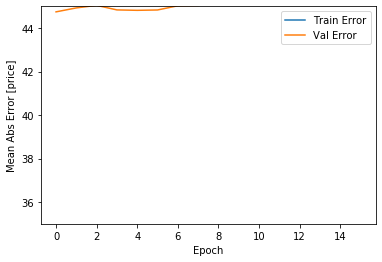

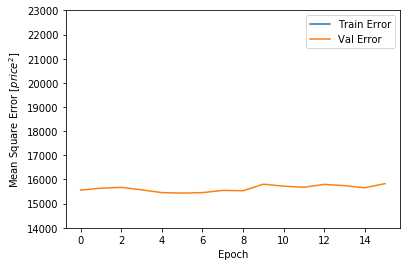

In [62]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([35,45])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([14000,23000])
  plt.legend()
  plt.show()


plot_history(history)

In [63]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} price".format(mae))

5258/5258 - 0s - loss: 29582.7930 - mae: 45.6212 - mse: 29582.7949
Testing set Mean Abs Error: 45.62 price


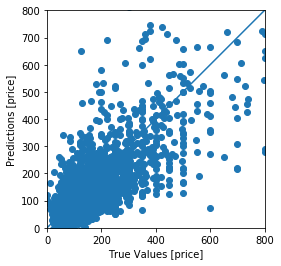

In [64]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,800])
plt.ylim([0,800])
_ = plt.plot([0,800], [0,800])

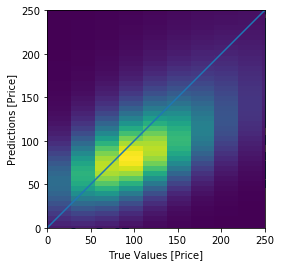

In [65]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')

plt.xlim([0,250])
plt.ylim([0,250])
_ = plt.plot([0,700], [0,700])
import numpy as np
from scipy.stats import kde

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
x = test_labels
y = test_predictions
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()



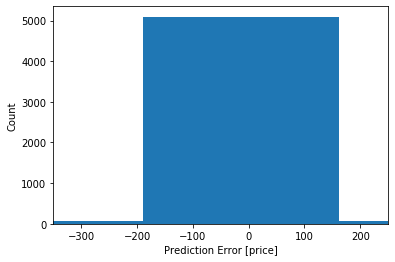

In [59]:
error = test_predictions - test_labels
plt.xlim(-350,250)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")